In [185]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

audio_path = 'edm/born_mitiS.mp3'
x , sr = librosa.load(audio_path, sr=44100)

print(type(x), type(sr))

print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(11707392,) 44100


In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                  fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,                                              ref=np.max),
                      y_axis='mel', fmax=8000,
                      x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Dr. Dre - Still D.R.E. (Rap)')
plt.tight_layout()


In [ ]:


plt.figure(figsize=(14, 5))
plt.title = 'Born MitiS'
librosa.display.waveplot(x, sr=sr)

In [ ]:
#spectral centroid
from sklearn import preprocessing
import numpy as np
spectral_centroidzzz = librosa.feature.spectral_centroid(x, sr=sr)[0]

spectral_centroidzzz = np.reshape(spectral_centroidzzz, (-1, 1))

frames = range(len(spectral_centroidzzz))
time = librosa.frames_to_time(frames)

fig =plt.figure()
fig.suptitle('MitiS - Born (EDM)')
#plot spectral centroid
idx = int(4e6)
librosa.display.waveplot(x[:idx], sr=sr, alpha=0.4)


plt.plot(time[:idx], preprocessing.minmax_scale(spectral_centroidzzz)[:idx], color='r')

#print(np.mean(spectral_centroidzzz))

Text(0, 0.5, 'Notes')

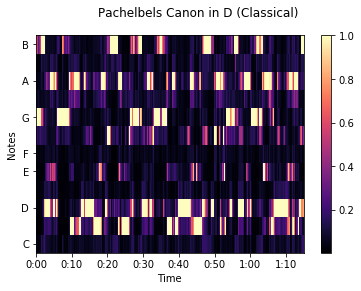

In [143]:
#CHROMA FREQUENCIES

x_harm = librosa.effects.harmonic(y=x, margin=8)

#smooth local neaightest neibhor
chroma_os_harm = librosa.feature.chroma_cqt(y=x_harm, sr=sr, bins_per_octave=12*3)

#filter harmonic transients
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))

#zoom in only section of song
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([45, 120])))])



fig =plt.figure()
fig.suptitle('Pachelbel''s Canon in D (Classical)')


librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Notes')


(20, 22867)


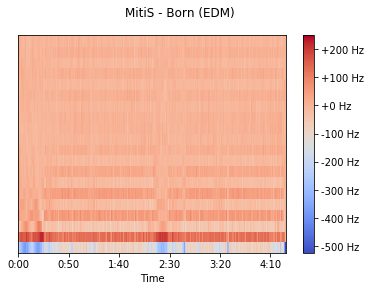

In [186]:
#MFCCS


mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:

fig =plt.figure()
fig.suptitle('MitiS - Born (EDM)')


librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f Hz')

In [ ]:
#spectral centroid
from sklearn import preprocessing
import numpy as np
spectral_rolloffs = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

spectral_rolloffs = np.reshape(spectral_rolloffs, (-1, 1))


#plot spectral centroid
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(time, preprocessing.minmax_scale(spectral_rolloffs), color='r')


In [157]:
 # 1 number of zero crossings
zero_crossings = np.mean(librosa.zero_crossings(x))

print(zero_crossings)

0.05684639243308843


In [ ]:
import librosa.display
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import numpy as np

import librosa



import os
rows = []
genres = ['westcoastrap', 'edm', 'classical', 'jazz', 'alternative']

# coded this so currGenre must match name of the directory :/

for currGenre in genres:
    for filename in os.listdir(currGenre):
        #get song
        audio_path = currGenre + '/' + filename
        print(audio_path)
        x , sr = librosa.load(audio_path, sr=44100)

        # 1 number of zero crossings
        zero_crossings = np.mean(librosa.zero_crossings(x))

        #2 spectral centroid
        spectral_centroids = np.mean(librosa.feature.spectral_centroid(x, sr=sr))

        #3 chroma
        chroma_stft = np.mean(librosa.feature.chroma_stft(x, sr=sr))


        #4 spectral bandwidth
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr))


        #mfcc
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        
        mfcc_arr = []
        for e in mfcc:
            mfcc_arr.append(np.mean(e))
        

        rows.append([filename, currGenre, zero_crossings, spec_bw, spectral_centroids, chroma_stft] + mfcc_arr)
        


In [ ]:
import csv
    
#put data in csv file
with open('newdata.csv', 'wt') as csvfile:
    csv_writer = csv.writer(csvfile)
     
    csv_writer.writerow(['song name', 'genre', 'zero crossing rate', 'spectral bandwidth', 'spectral centroid', 'chroma'] + msfcc_names)
     
    for row in rows:
        csv_writer.writerow(row)
        

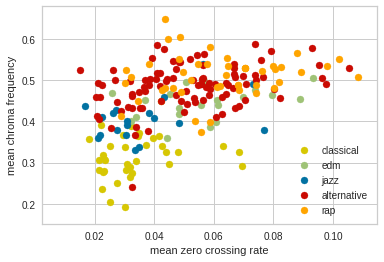

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
song_names = data['song name']
song_names
data = data.drop(columns=['song name'])


#classical
zcr_classical = list(data[data.genre == 'classical']['zero crossing rate'])
specCentroid_classical = list(data[data.genre == 'classical']['chroma'])

#edm
zcr_edm = list(data[data.genre == 'edm']['zero crossing rate'])
specCentroid_edm = list(data[data.genre == 'edm']['chroma'])

#jazz
zcr_jazz = list(data[data.genre == 'jazz']['zero crossing rate'])
specCentroid_jazz = list(data[data.genre == 'jazz']['chroma'])


#alternative
zcr_alt = list(data[data.genre == 'alternative']['zero crossing rate'])
specCentroid_alt = list(data[data.genre == 'alternative']['chroma'])

#rap
zcr_rap = list(data[data.genre == 'westcoastrap']['zero crossing rate'])
specCentroid_rap = list(data[data.genre == 'westcoastrap']['chroma'])


plt.scatter(zcr_classical, specCentroid_classical, c='y')
plt.scatter(zcr_edm, specCentroid_edm, c='g')
plt.scatter(zcr_jazz, specCentroid_jazz, c='b')
plt.scatter(zcr_alt, specCentroid_alt, c='r')
plt.scatter(zcr_rap, specCentroid_rap, c='orange')
plt.xlabel('mean zero crossing rate')
plt.ylabel('mean chroma frequency')

plt.legend(['classical', 'edm', 'jazz', 'alternative', 'rap'],loc=4)

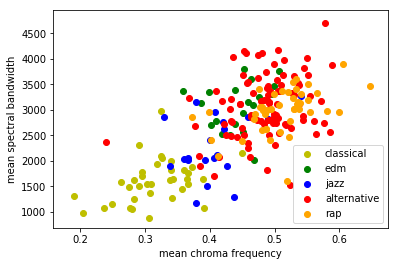

In [193]:
#classical
zcr_classical = list(data[data.genre == 'classical']['chroma'])
specCentroid_classical = list(data[data.genre == 'classical']['spectral bandwidth'])

#edm
zcr_edm = list(data[data.genre == 'edm']['chroma'])
specCentroid_edm = list(data[data.genre == 'edm']['spectral bandwidth'])

#jazz
zcr_jazz = list(data[data.genre == 'jazz']['chroma'])
specCentroid_jazz = list(data[data.genre == 'jazz']['spectral bandwidth'])

#altnerative
zcr_alt = list(data[data.genre == 'alternative']['chroma'])
specCentroid_alt = list(data[data.genre == 'alternative']['spectral bandwidth'])

#rap
zcr_rap = list(data[data.genre == 'westcoastrap']['chroma'])
specCentroid_rap = list(data[data.genre == 'westcoastrap']['spectral bandwidth'])


plt.scatter(zcr_classical, specCentroid_classical, c='y')
plt.scatter(zcr_edm, specCentroid_edm, c='g')
plt.scatter(zcr_jazz, specCentroid_jazz, c='b')
plt.scatter(zcr_alt, specCentroid_alt, c='r')
plt.scatter(zcr_rap, specCentroid_rap, c='orange')

plt.xlabel('mean chroma frequency')
plt.ylabel('mean spectral bandwidth')

plt.legend(['classical', 'edm', 'jazz', 'alternative', 'rap'],loc=4)

In [ ]:
#classical
zcr_classical = list(data[data.genre == 'classical']['spectral centroid'])
specCentroid_classical = list(data[data.genre == 'classical']['spectral bandwidth'])

#edm
zcr_edm = list(data[data.genre == 'edm']['spectral centroid'])
specCentroid_edm = list(data[data.genre == 'edm']['spectral bandwidth'])

#jazz
zcr_jazz = list(data[data.genre == 'jazz']['spectral centroid'])
specCentroid_jazz = list(data[data.genre == 'jazz']['spectral bandwidth'])

#altnerative
zcr_alt = list(data[data.genre == 'alternative']['spectral centroid'])
specCentroid_alt = list(data[data.genre == 'alternative']['spectral bandwidth'])

#rap
zcr_rap = list(data[data.genre == 'westcoastrap']['spectral centroid'])
specCentroid_rap = list(data[data.genre == 'westcoastrap']['spectral bandwidth'])


plt.scatter(zcr_classical, specCentroid_classical, c='y')
plt.scatter(zcr_edm, specCentroid_edm, c='g')
plt.scatter(zcr_jazz, specCentroid_jazz, c='b')
plt.scatter(zcr_alt, specCentroid_alt, c='r')
plt.scatter(zcr_rap, specCentroid_rap, c='orange')

plt.xlabel('mean spectral centroid')
plt.ylabel('mean spectral bandwidth')

plt.legend(['classical', 'edm', 'jazz', 'alternative', 'rap'],loc=4)

In [3]:
#data2 = data[data.genre != 'westcoastrap']
msfcc_names = []
for i in range(1, 21):
    msfcc_names.append('mfcc{0}'.format(i))
inputs = data[['genre']]
outputs = data[['zero crossing rate', 'spectral bandwidth', 'spectral centroid', 'chroma'] + msfcc_names]

In [4]:
from sklearn.model_selection import train_test_split

# creating a dict file  
genre_dict = {'alternative': 0, 'westcoastrap': 1,
                 'edm': 2, 'jazz': 3, 'classical': 4} 

inputs.genre = [genre_dict[item] for item in inputs.genre]

X_train, X_test, y_train, y_test = train_test_split(outputs, inputs, test_size=0.2)





/home/ben/music_classifier/venv/lib/python3.5/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/home/ben/music_classifier/venv/lib/python3.5/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/home/ben/music_classifier/venv/lib/python3.5/site-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.estimator.fit(X, y)


accuracy:  0.6363636363636364
f1score estimate using mean
0.6363042186571599


very confusing matrix


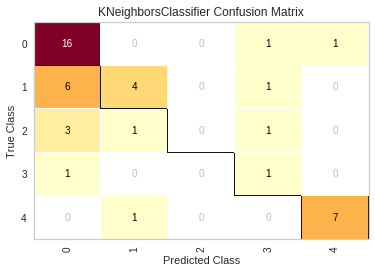

[[16  6  3  1  0]
 [ 0  4  1  0  1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  0]
 [ 1  0  0  0  7]]
[0, 1, 2, 3, 4]
{'westcoastrap': 1, 'classical': 4, 'alternative': 0, 'jazz': 3, 'edm': 2}


In [24]:
# K nearest neighbor testing
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn.model_selection import KFold, StratifiedKFold
from yellowbrick.classifier import ConfusionMatrix

k = 10

model = neighbors.KNeighborsClassifier(k)

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

print('accuracy: ', model.score(X_test, y_test))



scorerVar = make_scorer(f1_score, pos_label=1, average='micro')

scores = cross_val_score(model, X_train, 
                            y_train['genre'], scoring = scorerVar, cv = StratifiedKFold(5, True))


print('f1score estimate using mean')
print(scores.mean())

print("\n")

print('very confusing matrix')

cm = ConfusionMatrix(model, classes=[0,1,2,3,4])


# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()


label_ord = list(set(y_test['genre']))
Titanic_Conf_matrix = confusion_matrix(y_hat, y_test['genre'], labels=label_ord)
print(Titanic_Conf_matrix)
print(label_ord)

print(genre_dict)




/home/ben/music_classifier/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ben/music_classifier/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ben/music_classifier/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ben/music_classifier/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ben/musi

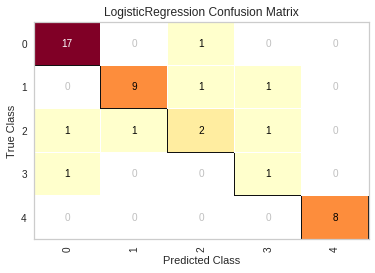

f1score estimate using mean
0.8349079025549614


very confusing matrix
[[17  0  1  1  0]
 [ 0  9  1  0  0]
 [ 1  1  2  0  0]
 [ 0  1  1  1  0]
 [ 0  0  0  0  8]]


In [25]:
#logistic regression testing
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)


y_hat = model.predict(X_test)

model.score(X_test, y_test)


scorerVar = make_scorer(f1_score, pos_label=1, average='micro')

scores = cross_val_score(model, X_train, 
                            y_train['genre'], scoring = scorerVar, cv = StratifiedKFold(5, True))



cm = ConfusionMatrix(model, classes=[0,1,2,3,4])


# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

print('f1score estimate using mean')
print(scores.mean())

print("\n")

print('very confusing matrix')
Titanic_Conf_matrix = confusion_matrix(y_hat, y_test['genre'])
print(Titanic_Conf_matrix)



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#create a model object
model = SVC(C=10, gamma=1)

#train our model
model.fit(X_train, y_train)

#evaluate the model 
model.predict(X_test)
print(model.score(X_test, y_test))


In [ ]:

#this code prints cluters of all songs that are similar
from sklearn.neighbors import KDTree

arr = np.array(outputs.values)

tree = KDTree(arr, leaf_size=4)

# r = 1.5 (means radius 1.5)
all_nn_indices  = tree.query_radius(arr, r=150)

all_nns = [[song_names[idx] for idx in nn_indices] for nn_indices in all_nn_indices]
for nns in all_nns:
    print(nns)

In [30]:
#polynimal expansion with logicist regression 
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4)
pf.fit(X_train)
Phi = pf.transform(X_train)

model = linear_model.LogisticRegression()
model.fit(Phi, y_train)

y_hat1 = model.predict_proba(pf.transform(X_test))

print('perc_alt', 'perc_classical', 'perc_edm', 'perc_jazz', 'perc_rap')
for predicted_scores, idx in zip(y_hat1, X_test.index):
    # normalize percentages
    perc_alt = "%.2f" % ((predicted_scores[0] / sum(predicted_scores)) * 100)
    perc_classical = "%.2f" % ((predicted_scores[1] / sum(predicted_scores)) * 100)
    perc_edm = "%.2f" % ((predicted_scores[2] / sum(predicted_scores)) * 100)
    perc_jazz = "%.2f" % ((predicted_scores[3] / sum(predicted_scores)) * 100)
    perc_rap = "%.2f" % ((predicted_scores[4] / sum(predicted_scores)) * 100)
    
    print(song_names[idx])
    print(perc_alt, '    ', perc_classical, '       ', perc_edm, '    ', perc_jazz, '    ', perc_rap)
#order: 'alt', 'classical', 'edm', 'jazz'


model.score(pf.transform(X_test), y_test)



scorerVar = make_scorer(f1_score, pos_label=1, average='micro')

scores = cross_val_score(model, X_train, 
                            y_train['genre'], scoring = scorerVar, cv = StratifiedKFold(5, True))


print('f1score estimate using mean')
print(scores.mean())

print("\n")

print('very confusing matrix')
Titanic_Conf_matrix = confusion_matrix(y_hat, y_test['genre'])
print(Titanic_Conf_matrix)



/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


perc_alt perc_classical perc_edm perc_jazz perc_rap
Vivaldi Concerto for 4 Violins in B minor RV 580.mp3
0.00      0.00         0.00      0.00      100.00
Nujabes, Tupac, Nas - (Thugz Mansion & Luv Sic pt 3).mp3
0.00      89.42         10.58      0.00      0.00
Schubert - Serenade.mp3
0.01      0.00         0.00      1.10      98.89
08 The Infinite Pet.m4a
100.00      0.00         0.00      0.00      0.00
Ice Cube & Dr DRE - Natural Born Killaz.mp3
15.05      0.00         0.00      84.95      0.00
Gin and juice - Snoop Doggy Dogg.mp3
0.56      99.44         0.00      0.00      0.00
07 I Summon You.m4a
61.43      0.00         0.00      38.57      0.00
11 Untitled.m4a
0.00      0.00         0.00      100.00      0.00
Handel - Largo (from 'Xerxes') Opera.mp3
0.00      0.00         0.00      0.65      99.35
Hiroshi Suzuki-Romance.mp3
0.00      6.08         0.01      93.91      0.00
04 April Fool.m4a
99.98      0.00         0.02      0.00      0.00
03 In the Aeroplane Over the Sea.m4a
100.0

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [19]:
inv_map = {v: k for k, v in genre_dict.items()}
inv_map

{0: 'alternative', 1: 'westcoastrap', 2: 'edm', 3: 'jazz', 4: 'classical'}